In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

In [3]:
data.head(3)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [4]:
print('Rows: {} Columns: {}'.format(data.shape[0], data.shape[1]))

Rows: 32560 Columns: 15


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [8]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
print("Before removing duplicates:", data.duplicated().sum())

data = data[~data.duplicated()]

print("After removing duplicates:", data.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [11]:
data.Sex.value_counts()

Sex
 Male      21774
 Female    10762
Name: count, dtype: int64

In [19]:
data.head(1)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [20]:
columns = ['Workclass', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for column in columns:
    data[column] = data[column].str.strip()

In [22]:
data.Sex.value_counts()

Sex
Male      21774
Female    10762
Name: count, dtype: int64

In [25]:
data.Workclass.value_counts()

Workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [26]:
change_columns = ['Workclass', 'Occupation', 'Native_country']
for column in change_columns:
        data[column] = data[column].replace({'?': 'Unknown'})

In [27]:
data.Workclass.value_counts()

Workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

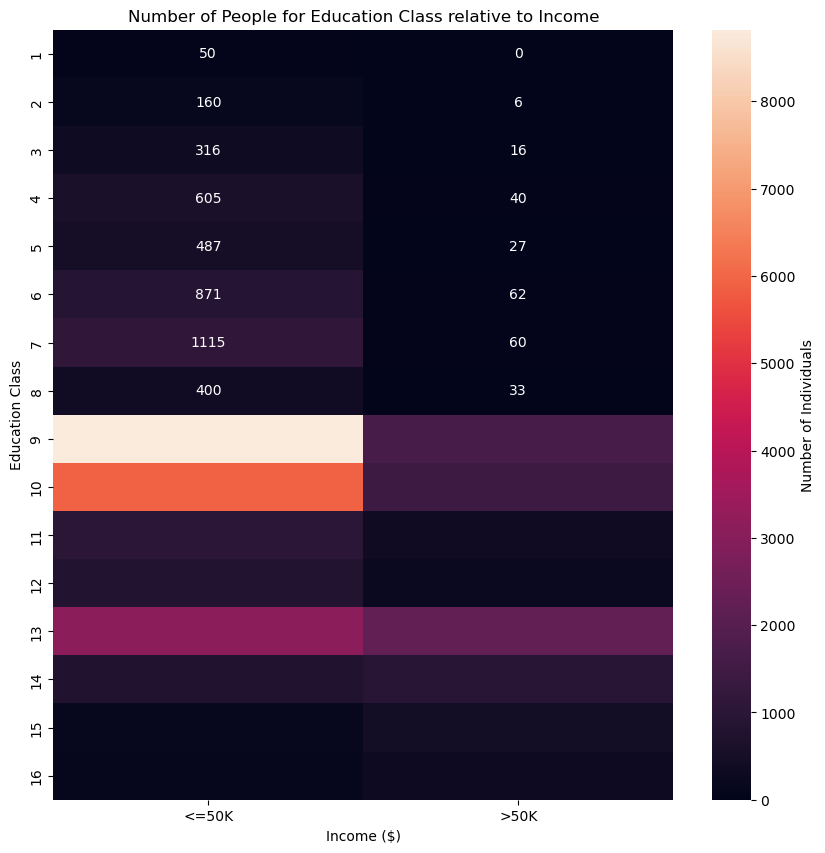

In [30]:
plt.figure(figsize=[10,10])
 
ct_counts = data.groupby(['Education_num', 'Income']).size()
ct_counts = ct_counts.reset_index(name = 'Count')
ct_counts = ct_counts.pivot(index = 'Education_num', columns = 'Income', values = 'Count').fillna(0)

sns.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

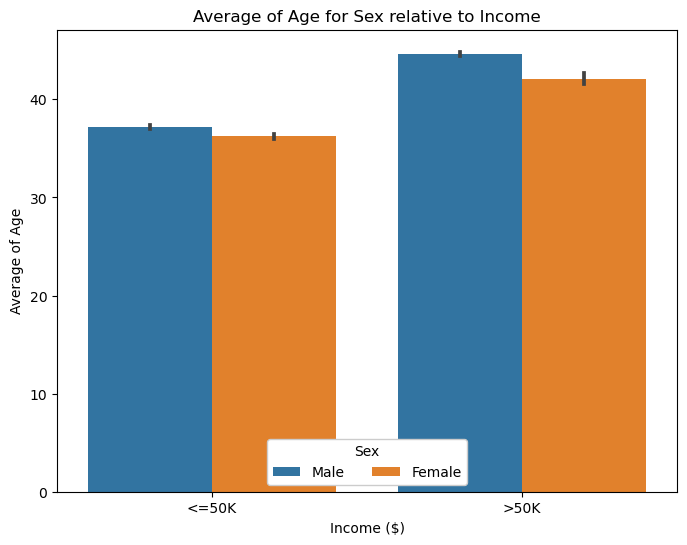

In [31]:
plt.figure(figsize=[8,6])
ax = sns.barplot(data = data, x = 'Income', y = 'Age', hue = 'Sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

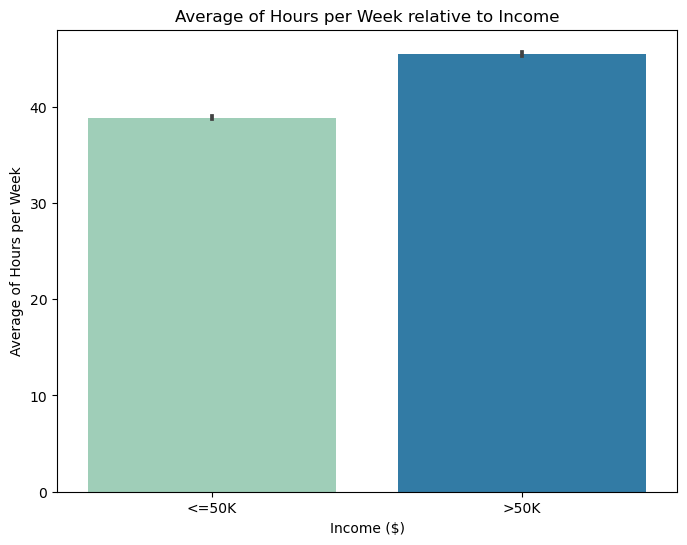

In [32]:
plt.figure(figsize=[8,6])
sns.barplot(data=data, x='Income', y='Hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

In [33]:
data_prep=data.copy()

In [34]:
from sklearn.preprocessing import MinMaxScaler
numerical = ['Age', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Fnlwgt']

scaler = MinMaxScaler()
data_prep[numerical] = scaler.fit_transform(data_prep[numerical])

In [35]:
data_prep.sample(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
28794,0.164384,Private,0.029275,Assoc-acdm,12,Never-married,Tech-support,Not-in-family,White,Male,0.000000,0.0,0.448980,United-States,<=50K
14411,0.698630,Private,0.103729,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.000000,0.0,0.397959,Italy,>50K
20721,0.205479,Self-emp-inc,0.225199,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,0.000000,0.0,0.346939,Haiti,<=50K
12131,0.753425,Private,0.328882,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0.063601,0.0,0.397959,United-States,<=50K
8945,0.465753,Private,0.090247,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.000000,0.0,0.500000,United-States,<=50K


In [37]:
data_prep['Sex'] = data_prep.Sex.replace({"Female": 0, "Male": 1})
data_prep['Income'] = data_prep.Income.replace({"<=50K": 0, ">50K": 1})
data_prep = pd.get_dummies(data_prep)

In [38]:
encoded = list(data_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

108 total features after one-hot encoding.


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


In [41]:
X = data_prep.drop('Income', axis=1)
y = data_prep['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
models = {}
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [43]:
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.8491286730976135 | test:  0.8483834438993363
F1-score: train:  0.6540298072158689 | test:  0.6530609042501963
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9999538975757808 | test:  0.8540079054385098
F1-score: train:  0.999904316392034 | test:  0.6719650058088666
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8616455665889277 | test:  0.8600935506171833
F1-score: train:  0.6815219479753549 | test:  0.677642684201062
---------------------------------------------------------


In [44]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [46]:
clf = RandomForestClassifier() 
clf.fit(X_train, y_train) 
results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:", 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999746932825824 | test:  0.9341621430608192
F1-score: train:  0.9999746941791446 | test:  0.9373785840126484


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
data_conc = data.copy()

In [49]:
for col in data_conc.columns:
    if data_conc[col].dtypes == 'object':
        encoder = LabelEncoder()
        data_conc[col] = encoder.fit_transform(data_conc[col])

In [50]:
Xc = data_conc.drop('Income', axis=1)
yc = data_conc['Income']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [51]:
clf = RandomForestClassifier()
clf.fit(Xc_train, yc_train)

print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['Feature', 'Importance'])
feat_imp


Features Importance:


,Feature,Importance
0,Age,15.577183
1,Workclass,4.090090
2,Fnlwgt,16.642707
3,Education,3.035631
4,Education_num,9.500347
5,Marital_status,5.791862
6,Occupation,6.815202
7,Relationship,10.716796
8,Race,1.360214
9,Sex,1.306350


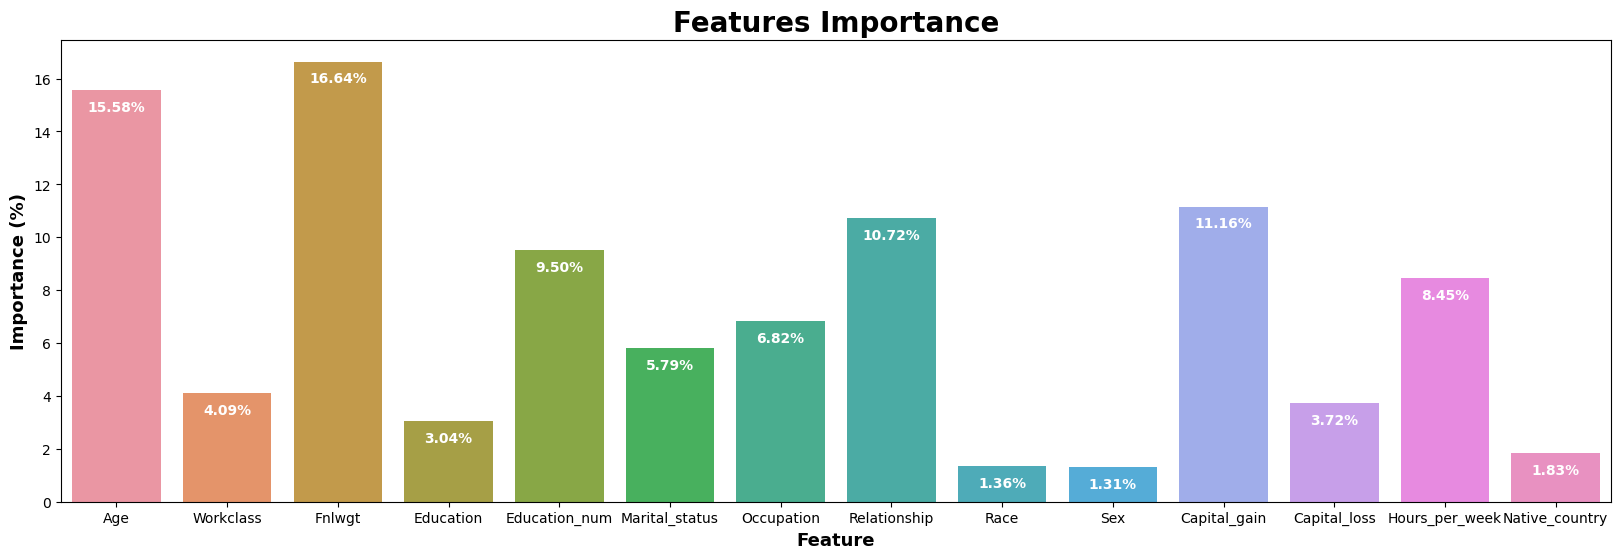

In [54]:
plt.figure(figsize=[20,6])
sns.barplot(data=feat_imp, x='Feature', y='Importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);

impo = feat_imp['Importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

In [55]:
data_final = data.copy()

In [56]:
data_final.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [58]:
data_final.drop(['Race', 'Sex', 'Capital_loss', 'Native_country'], axis=1, inplace=True)

In [59]:
numerical = ['Age', 'Capital_gain', 'Hours_per_week', 'Fnlwgt']
scaler = MinMaxScaler()
data_final[numerical] = scaler.fit_transform(data_final[numerical])

data_final['Income'] = data_final.Income.replace({"<=50K": 0, ">50K": 1})

data_final = pd.get_dummies(data_final)

Xf = data_final.drop('Income', axis=1)
yf = data_final['Income']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(Xf, yf)

In [60]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999696319134819 | test:  0.9299915902853767
F1-score: train:  0.9999696328100572 | test:  0.9336382470315538
